# International Energy Statistics 

https://www.kaggle.com/unitednations/international-energy-statistics?select=all_energy_statistics.csv

In [1]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', 100)

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

In [2]:
energy = pd.read_csv('all_energy_statistics.csv')
energy.head()

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,NaN,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,NaN,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,NaN,additives_and_oxygenates


In [3]:
energy.shape

(1189482, 7)

In [4]:
energy.dtypes

country_or_area           object
commodity_transaction     object
year                       int64
unit                      object
quantity                 float64
quantity_footnotes       float64
category                  object
dtype: object

In [5]:
energy.commodity_transaction.unique()

array(['Additives and Oxygenates - Exports',
       'Additives and Oxygenates - Imports',
       'Additives and Oxygenates - Production', ...,
       'White spirit and special boiling point industrial spirits - Transformation',
       'White spirit and special boiling point industrial spirits - Transformation in petrochemical plants',
       'Electricity - total wind production'], dtype=object)

In [6]:
energy.unit.unique()

array(['Metric tons,  thousand', 'Terajoules', 'Kilowatts,  thousand',
       'Kilowatt-hours, million', 'Cubic metres, thousand', 'Metric Tons'],
      dtype=object)

In [7]:
energy.category.unique()

array(['additives_and_oxygenates', 'animal_waste', 'anthracite',
       'aviation_gasoline', 'bagasse', 'biodiesel', 'biogases',
       'biogasoline', 'bitumen', 'black_liquor', 'blast_furnace_gas',
       'brown_coal_briquettes', 'brown_coal', 'charcoal', 'coal_tar',
       'coke_oven_coke', 'coking_coal', 'conventional_crude_oil',
       'direct_use_of_geothermal_heat',
       'direct_use_of_solar_thermal_heat',
       'electricity_net_installed_capacity_of_electric_power_plants',
       'ethane', 'falling_water', 'fuel_oil', 'fuelwood', 'gas_coke',
       'gas_oil_diesel_oil', 'gasoline_type_jet_fuel', 'gasworks_gas',
       'geothermal', 'hard_coal', 'heat', 'hydro', 'industrial_waste',
       'kerosene_type_jet_fuel', 'lignite', 'liquified_petroleum_gas',
       'lubricants', 'motor_gasoline', 'municipal_wastes', 'naphtha',
       'natural_gas_including_lng', 'natural_gas_liquids',
       'nuclear_electricity', 'of_which_biodiesel',
       'of_which_biogasoline', 'oil_shale_oil_sa

In [8]:
energy.describe()

,year,quantity,quantity_footnotes
count,1.189482e+06,1.189482e+06,163946.0
mean,2.002852e+03,1.842648e+05,1.0
std,7.167345e+00,1.585663e+07,0.0
min,1.990000e+03,-8.643480e+05,1.0
25%,1.997000e+03,1.400000e+01,1.0
50%,2.003000e+03,1.890000e+02,1.0
75%,2.009000e+03,2.265000e+03,1.0
max,2.014000e+03,6.680329e+09,1.0


In [9]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189482 entries, 0 to 1189481
Data columns (total 7 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   country_or_area        1189482 non-null  object 
 1   commodity_transaction  1189482 non-null  object 
 2   year                   1189482 non-null  int64  
 3   unit                   1189482 non-null  object 
 4   quantity               1189482 non-null  float64
 5   quantity_footnotes     163946 non-null   float64
 6   category               1189482 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 63.5+ MB


In [10]:
missing_values = pd.concat([energy.isnull().sum(), 100 * energy.isnull().mean()], axis=1)
missing_values.columns = ['Count', '%']
missing_values.sort_values(by='Count',ascending=False)

,Count,%
quantity_footnotes,1025536,86.217026
country_or_area,0,0.000000
commodity_transaction,0,0.000000
year,0,0.000000
unit,0,0.000000
quantity,0,0.000000
category,0,0.000000


A lot of missing values apparently 

In [11]:
df = energy.drop(['quantity_footnotes'],axis=1)
df.columns

Index(['country_or_area', 'commodity_transaction', 'year', 'unit', 'quantity',
       'category'],
      dtype='object')

In [12]:
df['country_or_area'] = df['country_or_area'].str.lower()
df['commodity_transaction'] = df['commodity_transaction'].str.lower()
df['unit'] = df['unit'].str.lower()
df['category'] = df['category'].str.lower()

df.head()

,country_or_area,commodity_transaction,year,unit,quantity,category
0,austria,additives and oxygenates - exports,1996,"metric tons, thousand",5.0,additives_and_oxygenates
1,austria,additives and oxygenates - exports,1995,"metric tons, thousand",17.0,additives_and_oxygenates
2,belgium,additives and oxygenates - exports,2014,"metric tons, thousand",0.0,additives_and_oxygenates
3,belgium,additives and oxygenates - exports,2013,"metric tons, thousand",0.0,additives_and_oxygenates
4,belgium,additives and oxygenates - exports,2012,"metric tons, thousand",35.0,additives_and_oxygenates


In [13]:
df.columns = ['country','commodity','year','unit','quantity','category']

df.head()

,country,commodity,year,unit,quantity,category
0,austria,additives and oxygenates - exports,1996,"metric tons, thousand",5.0,additives_and_oxygenates
1,austria,additives and oxygenates - exports,1995,"metric tons, thousand",17.0,additives_and_oxygenates
2,belgium,additives and oxygenates - exports,2014,"metric tons, thousand",0.0,additives_and_oxygenates
3,belgium,additives and oxygenates - exports,2013,"metric tons, thousand",0.0,additives_and_oxygenates
4,belgium,additives and oxygenates - exports,2012,"metric tons, thousand",35.0,additives_and_oxygenates


# G7 Countries

Filtering out the rest of the countries to focus on the G7

In [14]:
G7 = ['united states', 'canada', 'germany', 'france', 'italy', 'japan', 'united kingdom']
df = df[df['country'].isin(G7)]

In [15]:
df

,country,commodity,year,unit,quantity,category
26,france,additives and oxygenates - exports,2014,"metric tons, thousand",119.0,additives_and_oxygenates
27,france,additives and oxygenates - exports,2013,"metric tons, thousand",102.0,additives_and_oxygenates
28,france,additives and oxygenates - exports,2012,"metric tons, thousand",62.0,additives_and_oxygenates
29,france,additives and oxygenates - exports,2011,"metric tons, thousand",55.0,additives_and_oxygenates
30,france,additives and oxygenates - exports,2010,"metric tons, thousand",87.0,additives_and_oxygenates
...,...,...,...,...,...,...
1189456,united states,electricity - total wind production,1994,"kilowatt-hours, million",3483.0,wind_electricity
1189457,united states,electricity - total wind production,1993,"kilowatt-hours, million",3053.0,wind_electricity
1189458,united states,electricity - total wind production,1992,"kilowatt-hours, million",2917.0,wind_electricity
1189459,united states,electricity - total wind production,1991,"kilowatt-hours, million",3051.0,wind_electricity


In [16]:
def select_country(countryname):
    country_data = df[df.country.isin(countryname)].sort_values('year').reset_index()
    
    country_data.drop('index', axis=1, inplace=True)
    
    return country_data

In [17]:
us = select_country(['united states'])
canada = select_country(['canada'])
germany = select_country(['germany'])
france  = select_country(['france'])
italy = select_country(['italy']) 
japan = select_country(['japan'])
uk = select_country(['united kingdom'])

In [18]:
def select_category(country_data, categoryname):
    
    category_country = country_data[country_data.category.isin(categoryname)].sort_values('year').reset_index()
    
    category_country.drop('index', axis=1, inplace=True)
    
    return category_country

In [19]:
crude_us = select_category(us, ['conventional_crude_oil'])
crude_canada = select_category(canada, ['conventional_crude_oil'])
crude_germany = select_category(germany, ['conventional_crude_oil'])
crude_france = select_category(france, ['conventional_crude_oil'])
crude_italy = select_category(italy, ['conventional_crude_oil'])
crude_japan = select_category(japan, ['conventional_crude_oil'])
crude_uk = select_category(uk, ['conventional_crude_oil'])

In [20]:
def select_commodity(category_country, commodityname):
    
    commodity_country = category_country[category_country.commodity.isin(commodityname)].sort_values('year').reset_index()
    
    commodity_country.drop('index', axis=1, inplace=True)
    
    return commodity_country

In [21]:
crude_prod_us = select_commodity(crude_us,['conventional crude oil - production'])
crude_prod_canada = select_commodity(crude_canada,['conventional crude oil - production'])
crude_prod_germany = select_commodity(crude_germany,['conventional crude oil - production'])
crude_prod_france = select_commodity(crude_france,['conventional crude oil - production'])
crude_prod_italy = select_commodity(crude_italy,['conventional crude oil - production'])
crude_prod_japan = select_commodity(crude_japan,['conventional crude oil - production'])
crude_prod_uk = select_commodity(crude_uk, ['conventional crude oil - production'])

crude_import_us = select_commodity(crude_us,['conventional crude oil - imports'])
crude_import_canada = select_commodity(crude_canada,['conventional crude oil - imports'])
crude_import_germany = select_commodity(crude_germany,['conventional crude oil - imports'])
crude_import_france = select_commodity(crude_france,['conventional crude oil - imports'])
crude_import_italy = select_commodity(crude_italy,['conventional crude oil - imports'])
crude_import_japan = select_commodity(crude_japan,['conventional crude oil - imports'])
crude_import_uk = select_commodity(crude_uk,['conventional crude oil - imports'])

In [22]:
solar_us = select_category(us,['solar_electricity'])
solar_canada = select_category(canada,['solar_electricity'])
solar_germany = select_category(germany,['solar_electricity'])
solar_france = select_category(france,['solar_electricity'])
solar_italy = select_category(italy,['solar_electricity'])
solar_japan = select_category(japan,['solar_electricity'])
solar_uk = select_category(uk,['solar_electricity'])

solar_prod_us = select_commodity(solar_us, ['electricity - total solar production'])
solar_prod_canada = select_commodity(solar_canada, ['electricity - total solar production'])
solar_prod_germany = select_commodity(solar_germany, ['electricity - total solar production']) 
solar_prod_france = select_commodity(solar_france, ['electricity - total solar production'])
solar_prod_italy = select_commodity(solar_italy, ['electricity - total solar production'])
solar_prod_japan = select_commodity(solar_japan, ['electricity - total solar production'])
solar_prod_uk =select_commodity(solar_uk, ['electricity - total solar production'])

In [23]:
wind_us = select_category(us, ['wind_electricity'])
wind_canada = select_category(canada, ['wind_electricity'])
wind_germany = select_category(germany, ['wind_electricity'])
wind_france = select_category(france, ['wind_electricity'])
wind_italy = select_category(italy, ['wind_electricity'])
wind_japan = select_category(japan, ['wind_electricity'])
wind_uk = select_category(uk, ['wind_electricity'])

wind_prod_us = select_commodity(wind_us, ['electricity - total wind production'])
wind_prod_canada = select_commodity(wind_canada, ['electricity - total wind production'])
wind_prod_germany = select_commodity(wind_germany, ['electricity - total wind production'])
wind_prod_france = select_commodity(wind_france, ['electricity - total wind production'])
wind_prod_italy = select_commodity(wind_italy, ['electricity - total wind production'])
wind_prod_japan = select_commodity(wind_japan, ['electricity - total wind production'])
wind_prod_uk = select_commodity(wind_uk, ['electricity - total wind production'])

# Visualizations 

The visualization of the Conventional Crude Oil Production for the G7 Countries

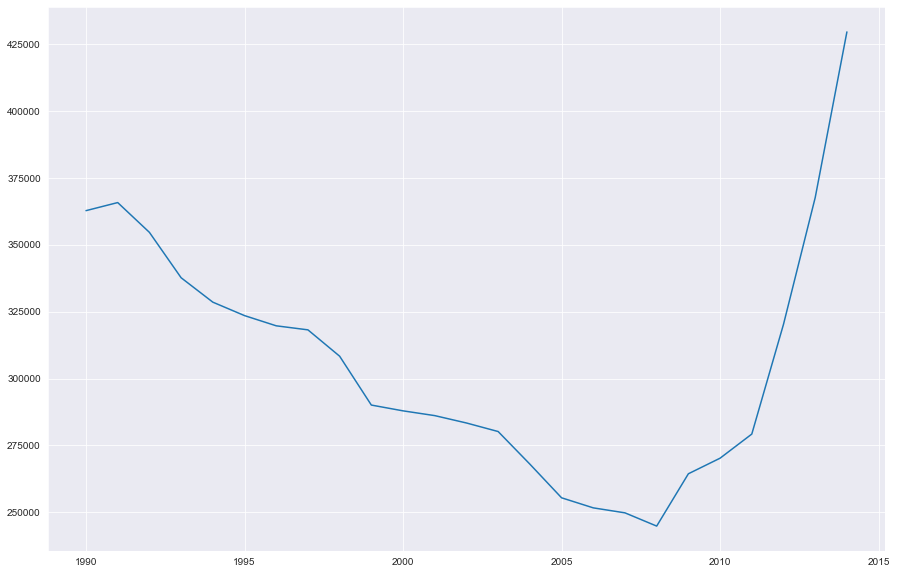

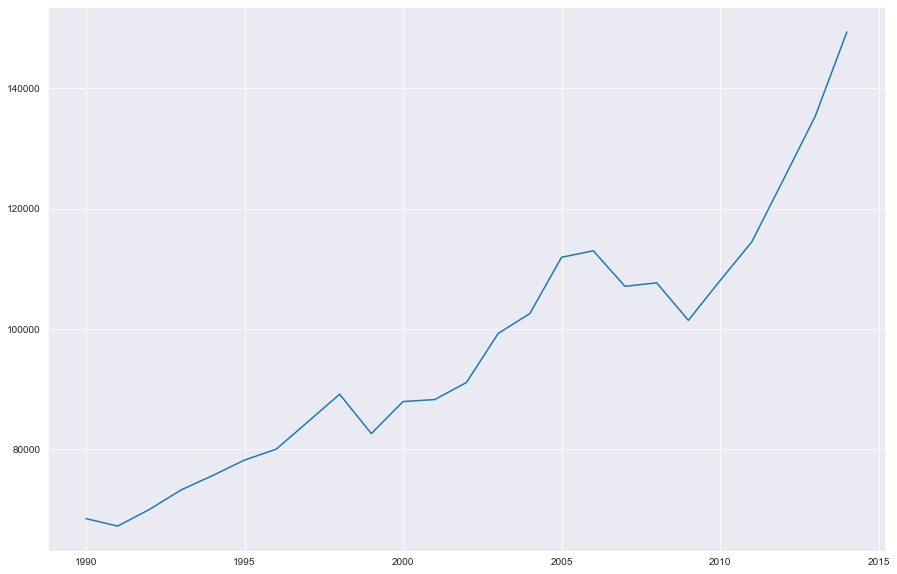

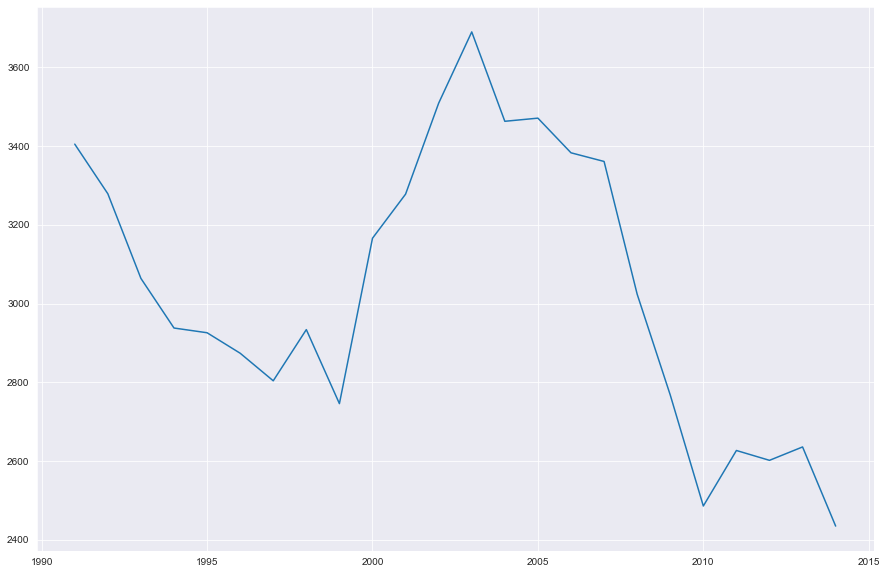

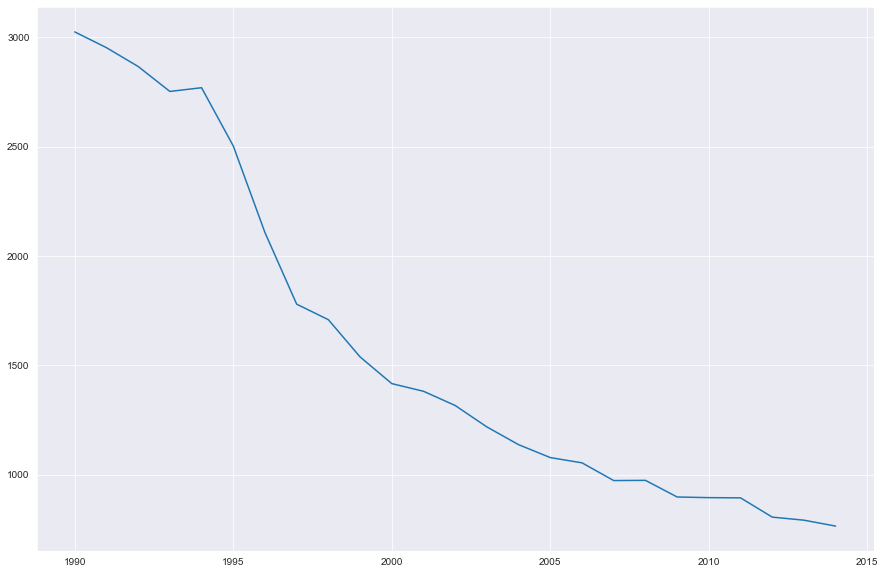

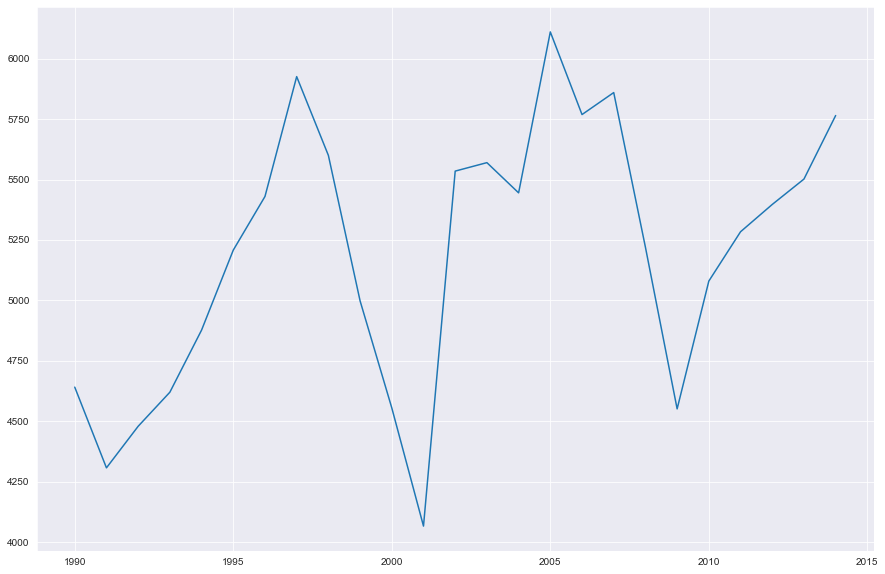

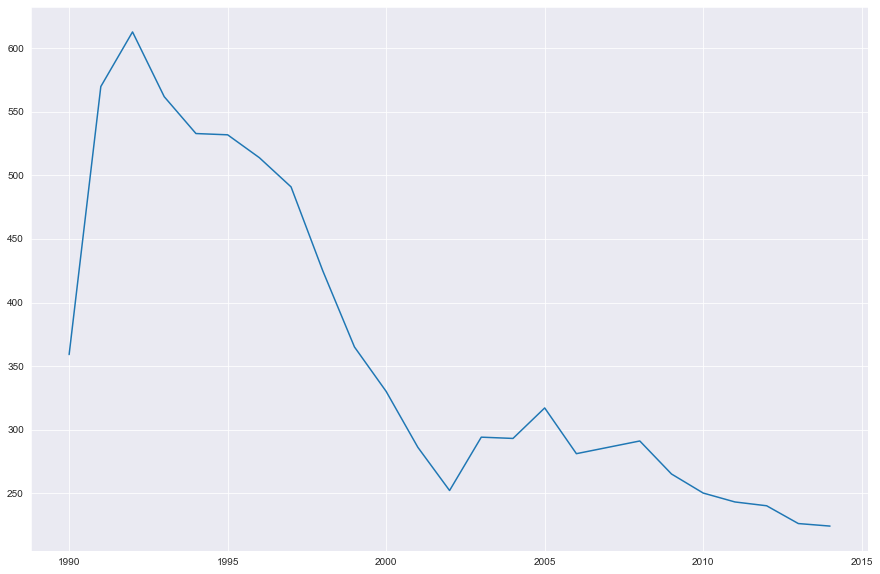

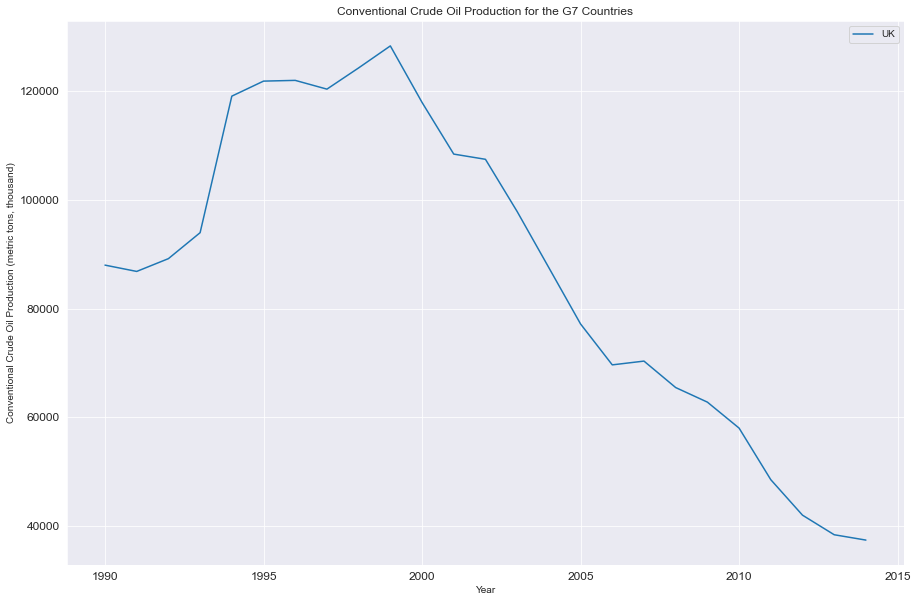

In [24]:
plt.figure(figsize=(15,10))
x1 = crude_prod_us.year
y1 = crude_prod_us.quantity
plt.plot(x1, y1, label='THE UNITED STATES')

plt.figure(figsize=(15,10))
x2 = crude_prod_canada.year
y2 = crude_prod_canada.quantity
plt.plot(x2, y2, label='CANADA')

plt.figure(figsize=(15,10))
x3 = crude_prod_germany.year
y3 = crude_prod_germany.quantity
plt.plot(x3, y3, label='GERMANY')

plt.figure(figsize=(15,10))
x4 = crude_prod_france.year
y4 = crude_prod_france.quantity
plt.plot(x4, y4, label='FRANCE')

plt.figure(figsize=(15,10))
x5 = crude_prod_italy.year
y5 = crude_prod_italy.quantity
plt.plot(x5, y5, label='ITALY')

plt.figure(figsize=(15,10))
x6 = crude_prod_japan.year
y6 = crude_prod_japan.quantity
plt.plot(x6, y6, label='JAPAN')

plt.figure(figsize=(15,10))
x7 = crude_prod_uk.year
y7 = crude_prod_uk.quantity
plt.plot(x7, y7, label='UK')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Year')
plt.ylabel('Conventional Crude Oil Production (metric tons, thousand)')
plt.title('Conventional Crude Oil Production for the G7 Countries')
plt.legend(loc='best')
plt.show()

The visualization of the Conventional Crude Oil Imports for the G7 Countries

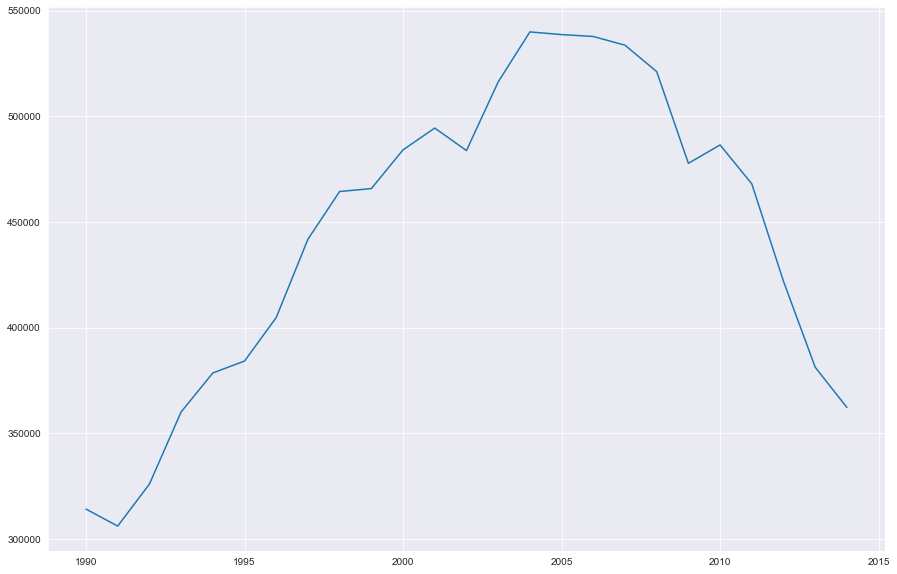

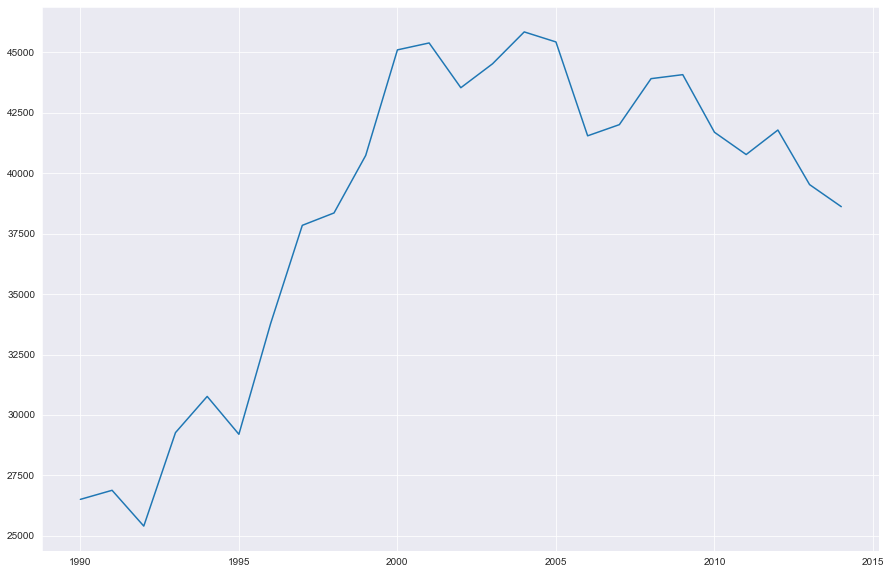

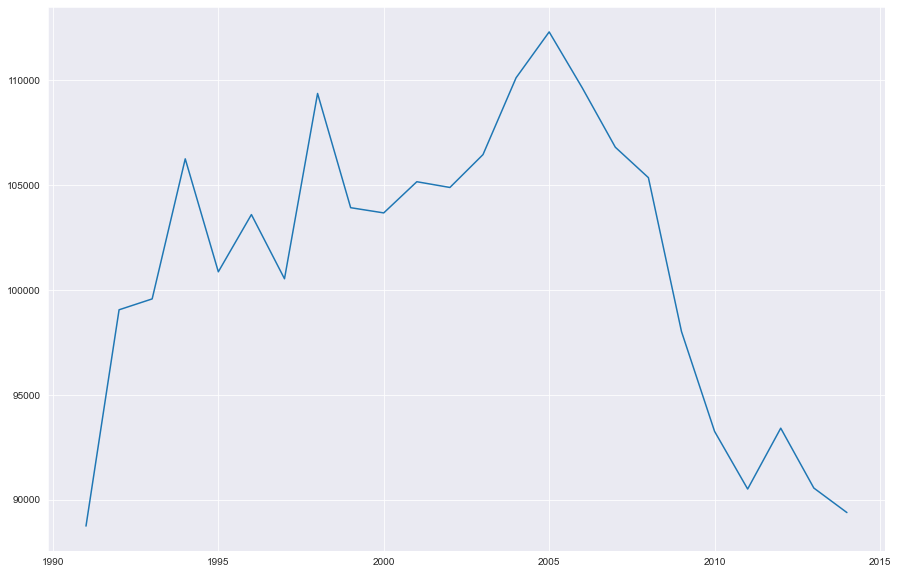

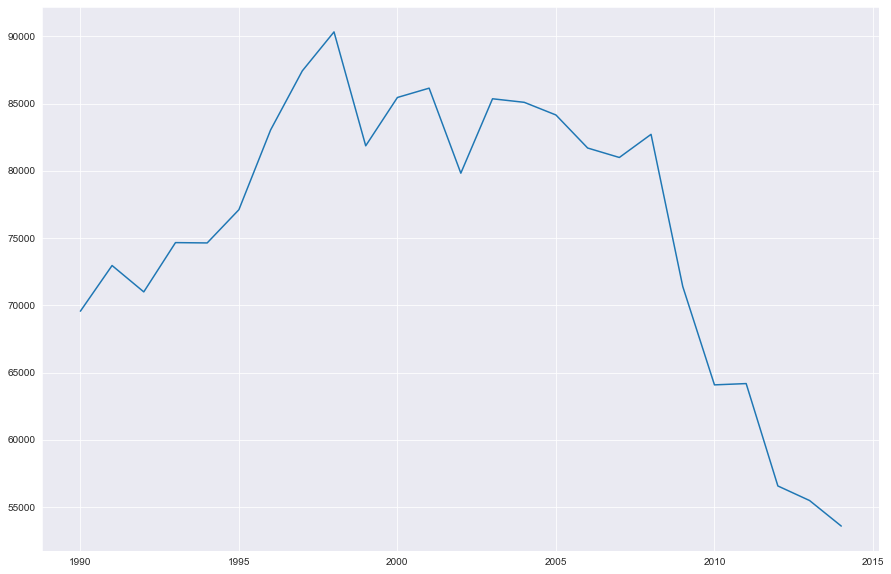

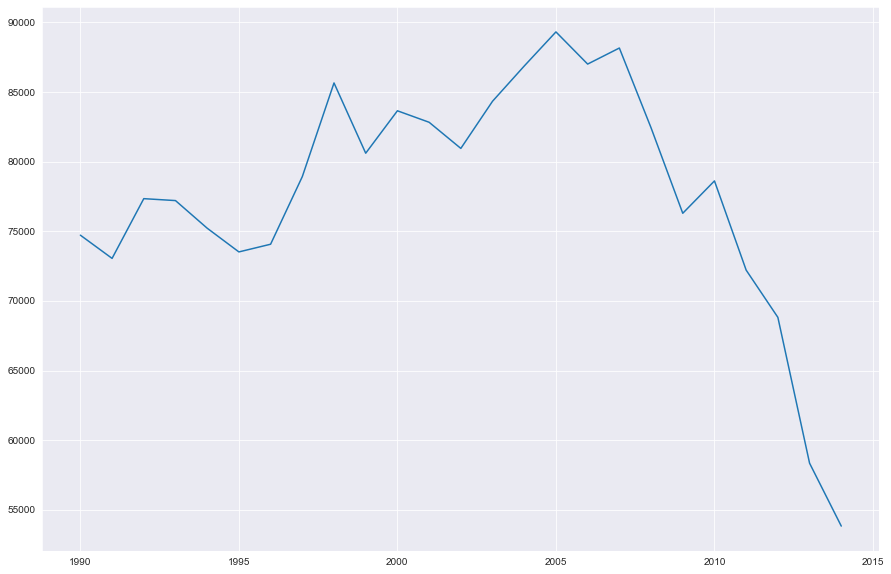

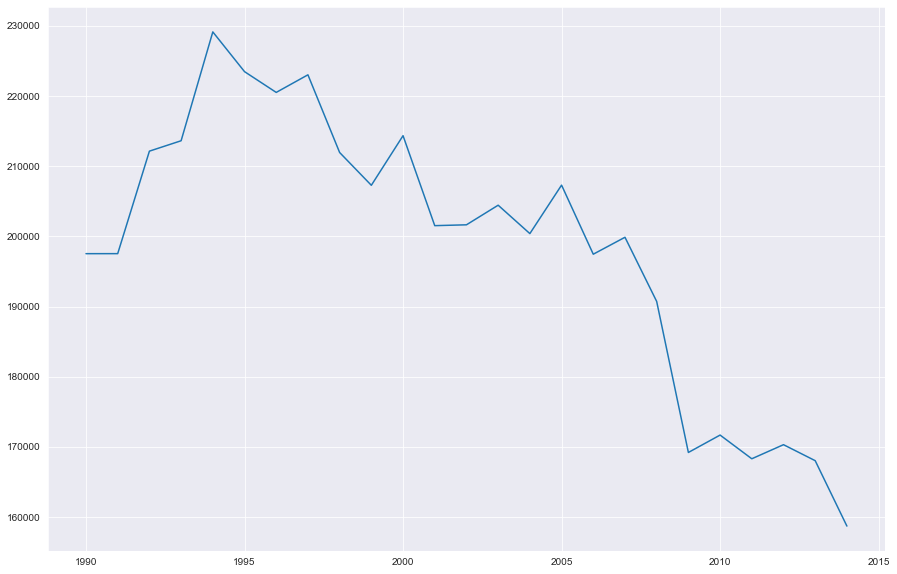

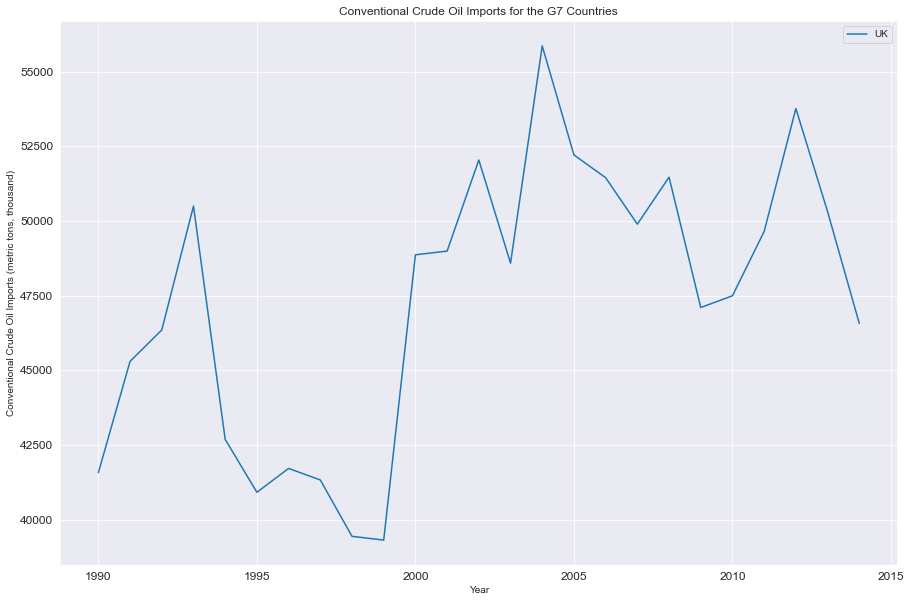

In [25]:
plt.figure(figsize=(15,10))
x1 = crude_import_us.year
y1 = crude_import_us.quantity
plt.plot(x1, y1, label='THE UNITED STATES')

plt.figure(figsize=(15,10))
x2 = crude_import_canada.year
y2 = crude_import_canada.quantity
plt.plot(x2, y2, label='CANADA')

plt.figure(figsize=(15,10))
x3 = crude_import_germany.year
y3 = crude_import_germany.quantity
plt.plot(x3, y3, label='GERMANY')

plt.figure(figsize=(15,10))
x4 = crude_import_france.year
y4 = crude_import_france.quantity
plt.plot(x4, y4, label='FRANCE')

plt.figure(figsize=(15,10))
x5 = crude_import_italy.year
y5 = crude_import_italy.quantity
plt.plot(x5, y5, label='ITALY')

plt.figure(figsize=(15,10))
x6 = crude_import_japan.year
y6 = crude_import_japan.quantity
plt.plot(x6, y6, label='JAPAN')

plt.figure(figsize=(15,10))
x7 = crude_import_uk.year
y7 = crude_import_uk.quantity
plt.plot(x7, y7, label='UK')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Year')
plt.ylabel('Conventional Crude Oil Imports (metric tons, thousand)')
plt.title('Conventional Crude Oil Imports for the G7 Countries')
plt.legend(loc='best')
plt.show()

The visualization of the Solar Electricity Production for the G7 Countries

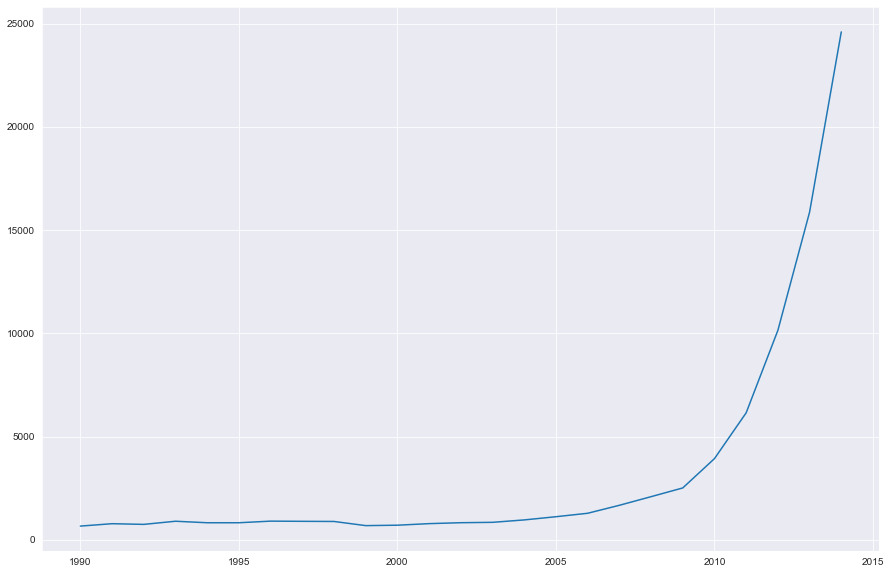

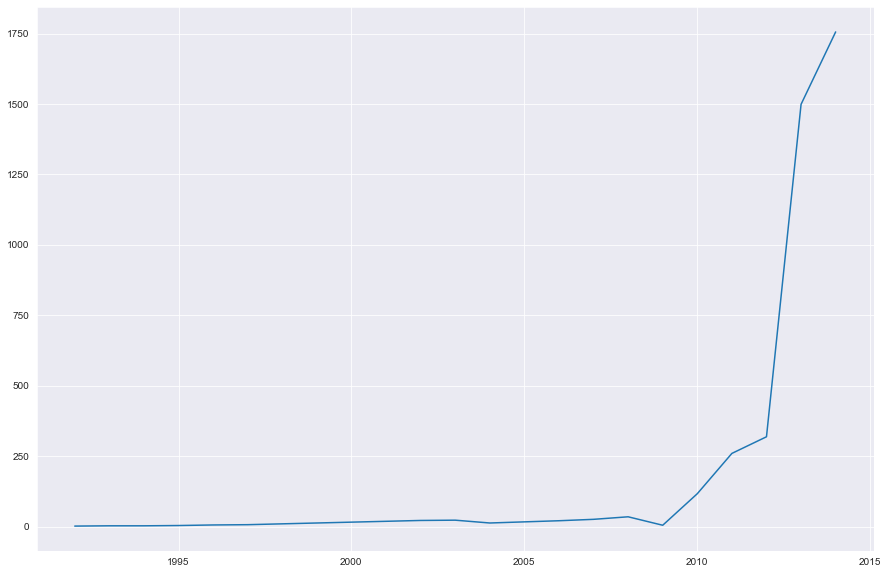

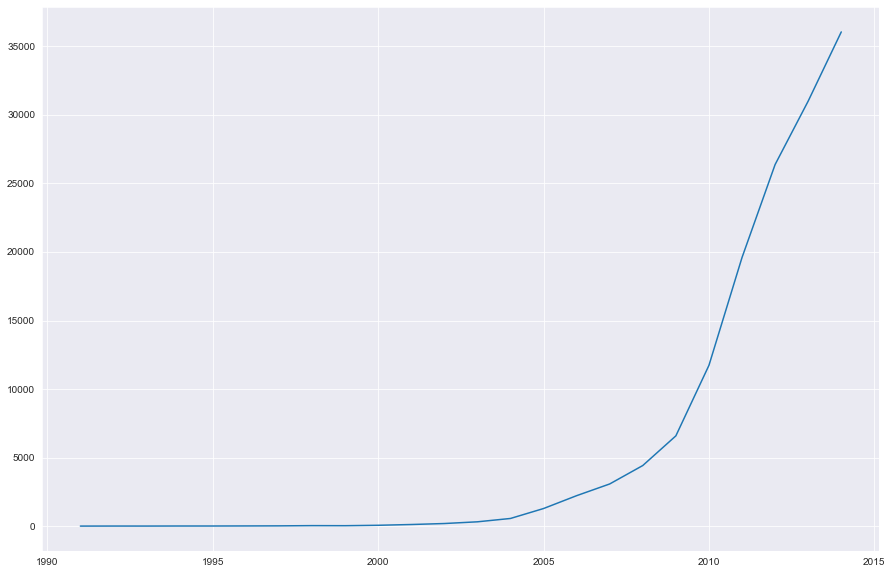

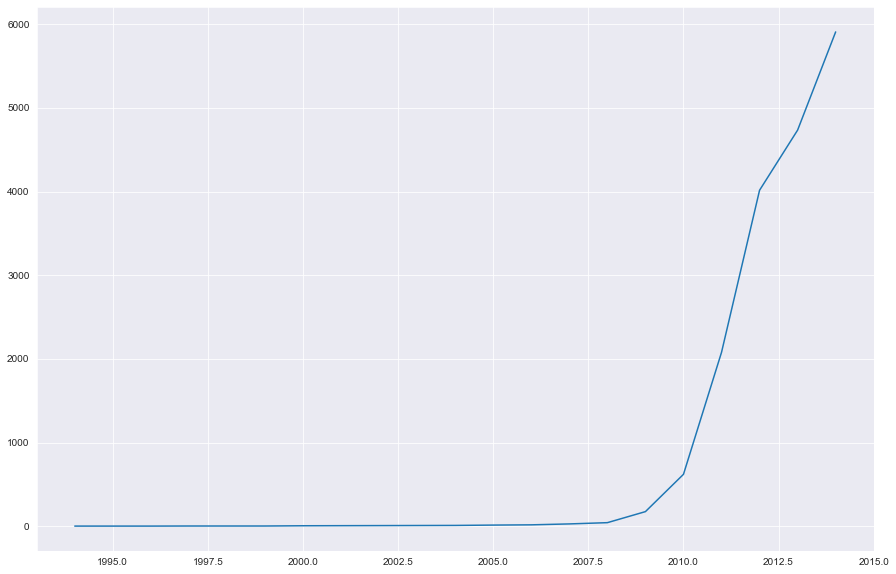

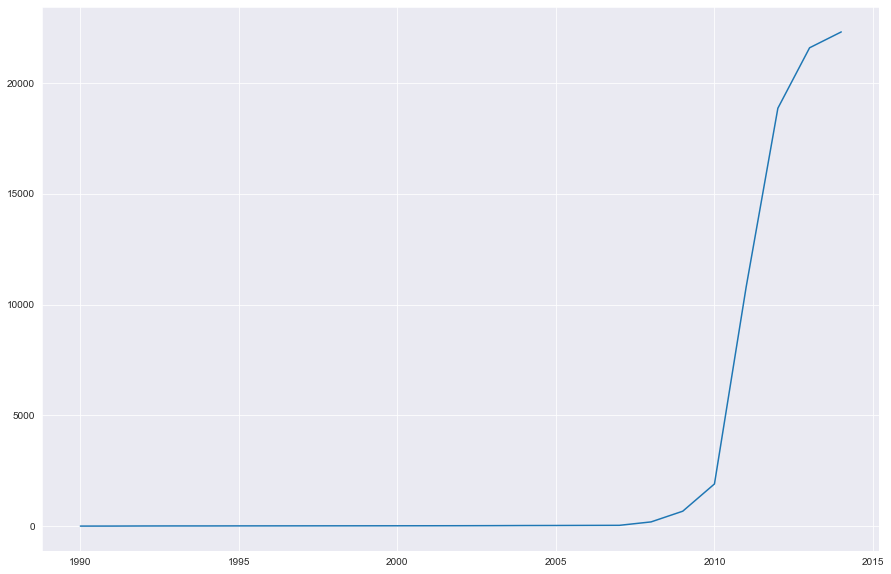

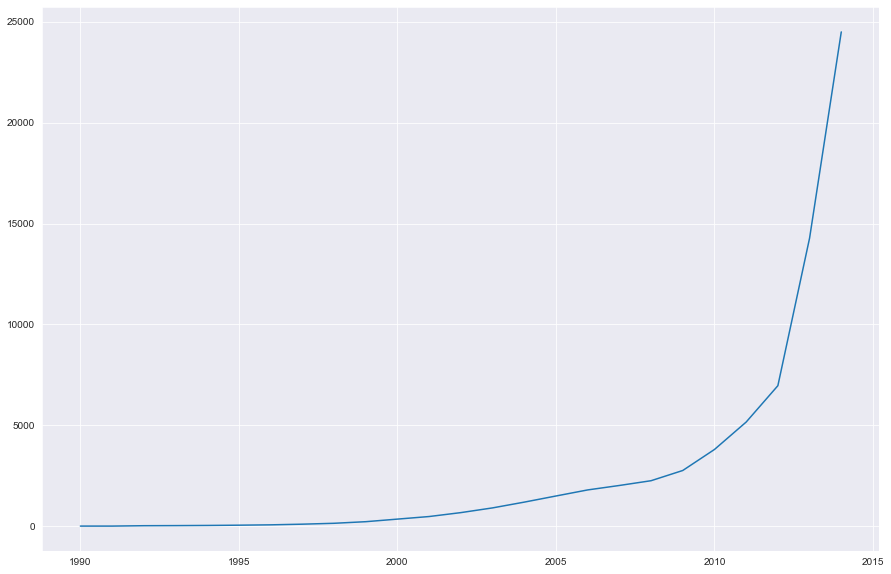

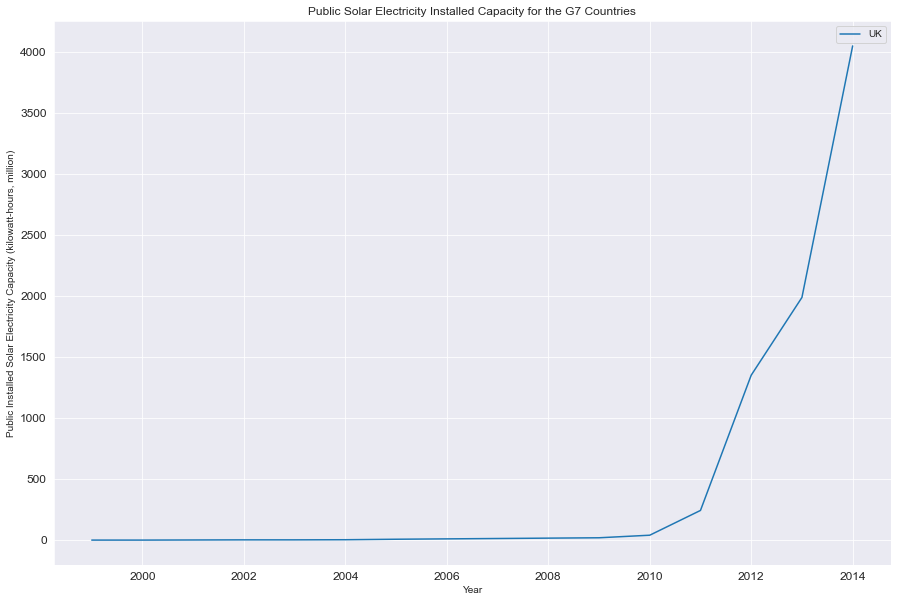

In [26]:
plt.figure(figsize=(15,10))
x1 = solar_prod_us.year
y1 = solar_prod_us.quantity
plt.plot(x1, y1, label='THE UNITED STATES')

plt.figure(figsize=(15,10))
x2 = solar_prod_canada.year
y2 = solar_prod_canada.quantity
plt.plot(x2, y2, label='CANADA')

plt.figure(figsize=(15,10))
x3 = solar_prod_germany.year
y3 = solar_prod_germany.quantity
plt.plot(x3, y3, label='GERMANY')

plt.figure(figsize=(15,10))
x4 = solar_prod_france.year
y4 = solar_prod_france.quantity
plt.plot(x4, y4, label='FRANCE')

plt.figure(figsize=(15,10))
x5 = solar_prod_italy.year
y5 = solar_prod_italy.quantity
plt.plot(x5, y5, label='ITALY')

plt.figure(figsize=(15,10))
x6 = solar_prod_japan.year
y6 = solar_prod_japan.quantity
plt.plot(x6, y6, label='JAPAN')

plt.figure(figsize=(15,10))
x7 = solar_prod_uk.year
y7 = solar_prod_uk.quantity
plt.plot(x7, y7, label='UK')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Year')
plt.ylabel('Public Installed Solar Electricity Capacity (kilowatt-hours, million)')
plt.title('Public Solar Electricity Installed Capacity for the G7 Countries')
plt.legend(loc='best')
plt.show()

The visualization of the Wind Electricity Production for the G7 Countries

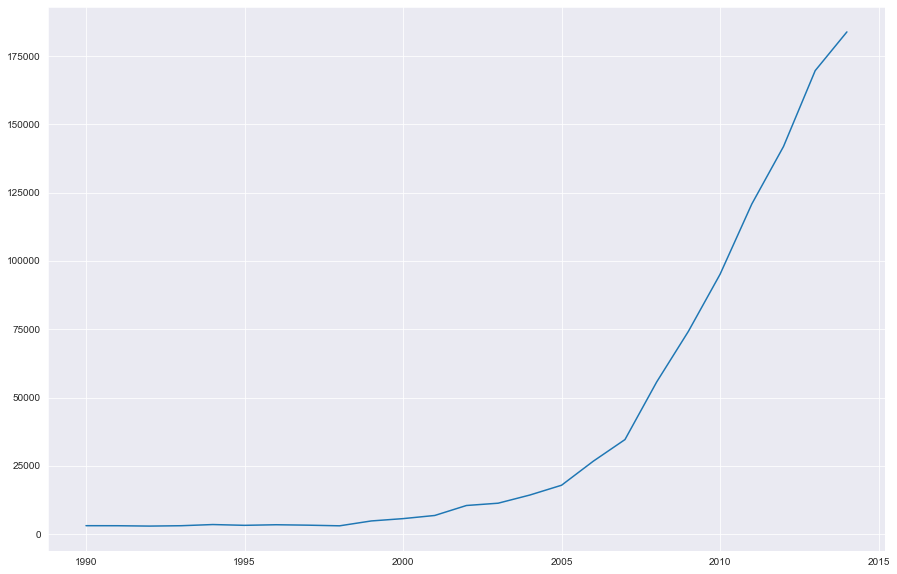

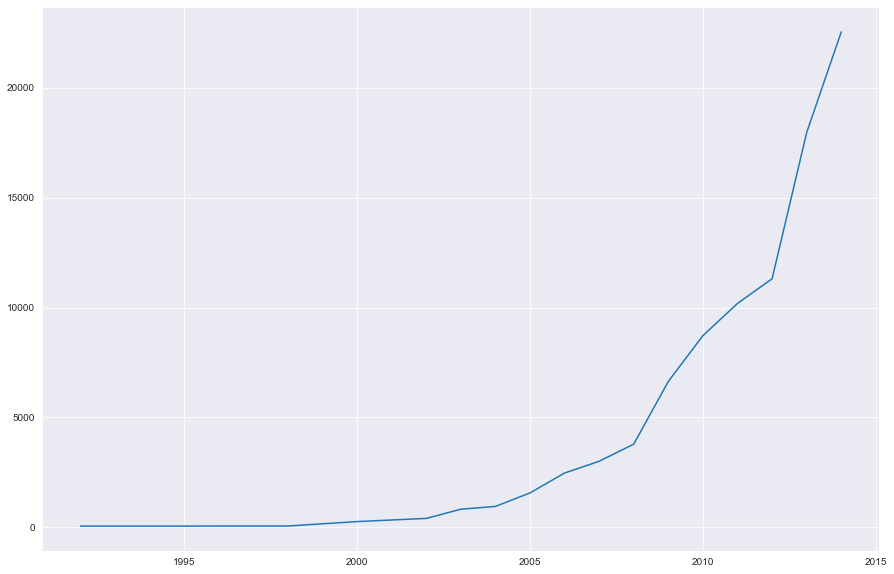

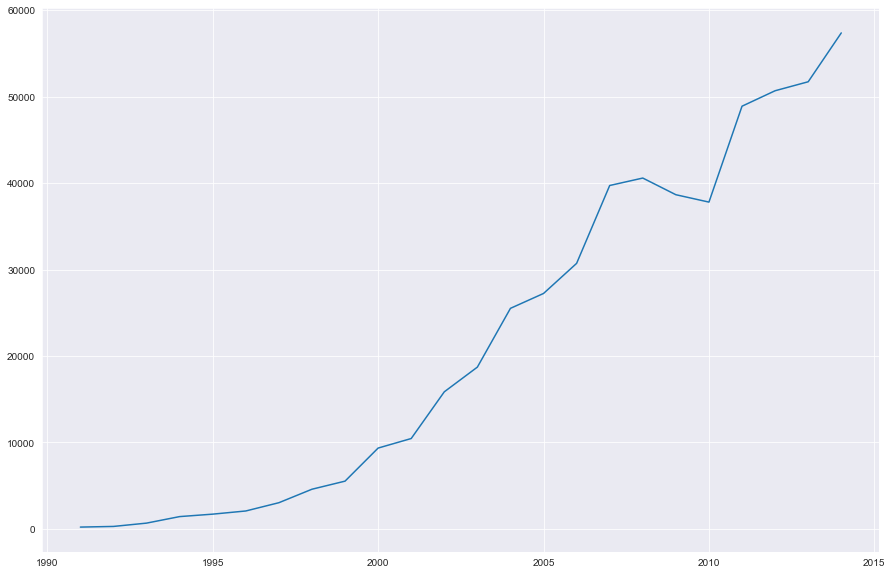

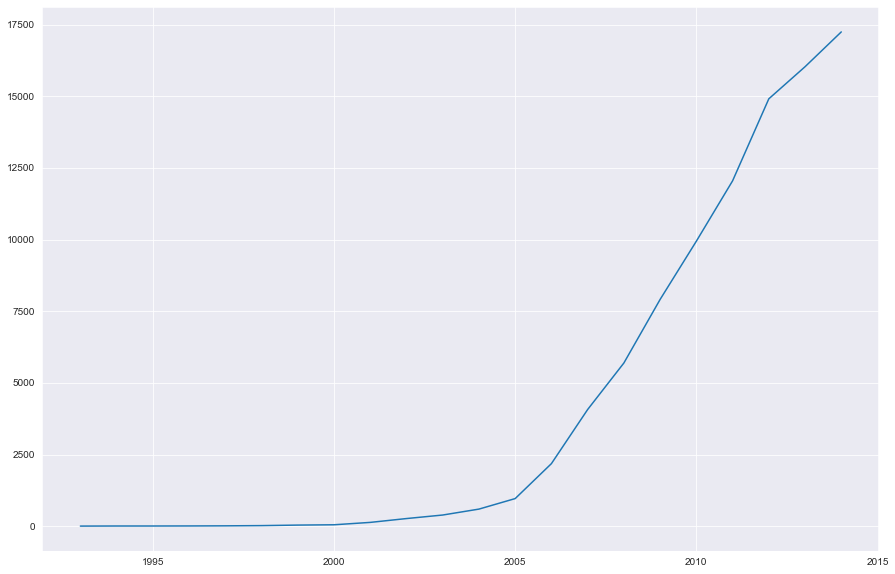

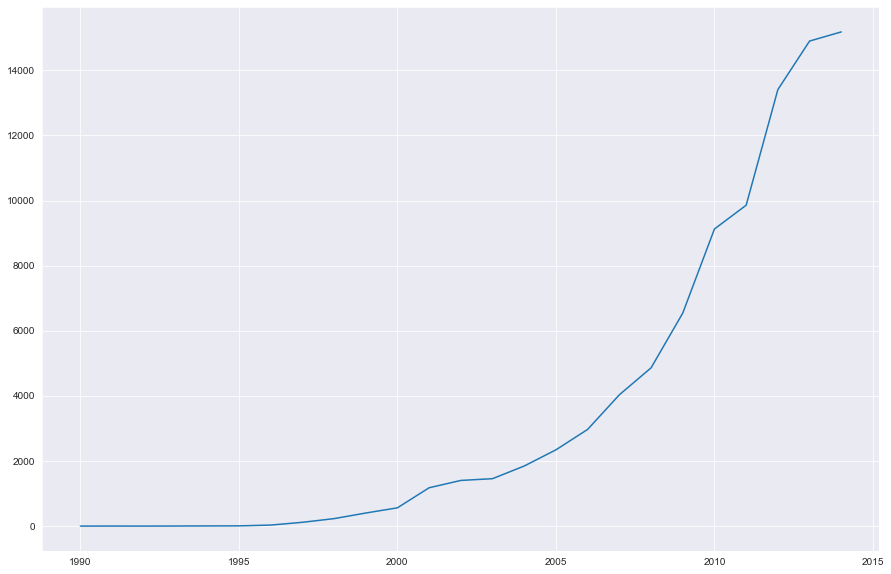

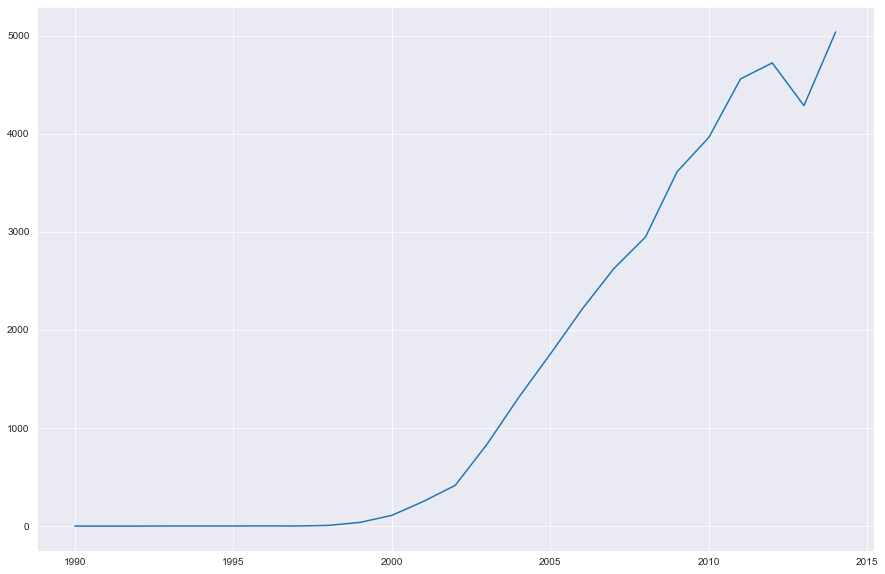

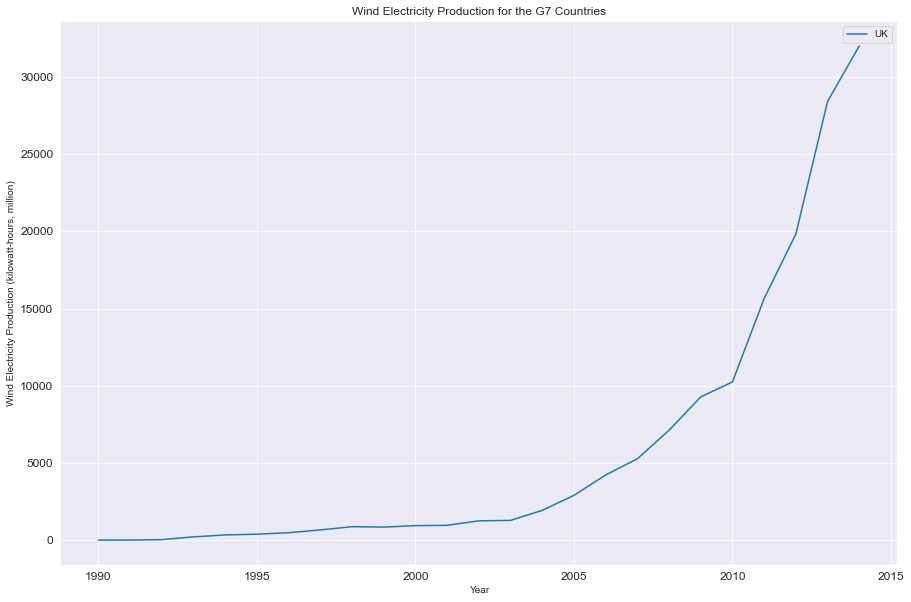

In [27]:
plt.figure(figsize=(15,10))
x1 = wind_prod_us.year
y1 = wind_prod_us.quantity
plt.plot(x1, y1, label='THE UNITED STATES')

plt.figure(figsize=(15,10))
x2 = wind_prod_canada.year
y2 = wind_prod_canada.quantity
plt.plot(x2, y2, label='CANADA')

plt.figure(figsize=(15,10))
x3 = wind_prod_germany.year
y3 = wind_prod_germany.quantity
plt.plot(x3, y3, label='GERMANY')

plt.figure(figsize=(15,10))
x4 = wind_prod_france.year
y4 = wind_prod_france.quantity
plt.plot(x4, y4, label='FRANCE')

plt.figure(figsize=(15,10))
x5 = wind_prod_italy.year
y5 = wind_prod_italy.quantity
plt.plot(x5, y5, label='ITALY')

plt.figure(figsize=(15,10))
x6 = wind_prod_japan.year
y6 = wind_prod_japan.quantity
plt.plot(x6, y6, label='JAPAN')

plt.figure(figsize=(15,10))
x7 = wind_prod_uk.year
y7 = wind_prod_uk.quantity
plt.plot(x7, y7, label='UK')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Year')
plt.ylabel('Wind Electricity Production (kilowatt-hours, million)')
plt.title('Wind Electricity Production for the G7 Countries')
plt.legend(loc='best')
plt.show()

# Comparing the Countries in the G7 Group

<AxesSubplot:xlabel='year', ylabel='quantity'>

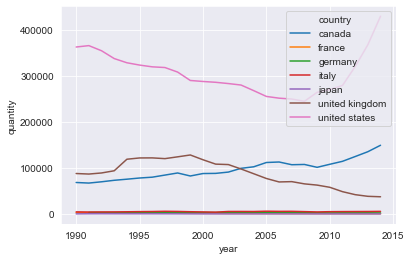

In [28]:
df_conventional_crude_oil = df[df.commodity=='conventional crude oil - production']
sns.lineplot(data=df_conventional_crude_oil,x='year',y='quantity',hue='country')

The United States,Canada, and the United Kingdom are leading in the Conventional crude oil production although the United Kingdom has been seeing a decline since the late 90s.

<AxesSubplot:xlabel='year', ylabel='quantity'>

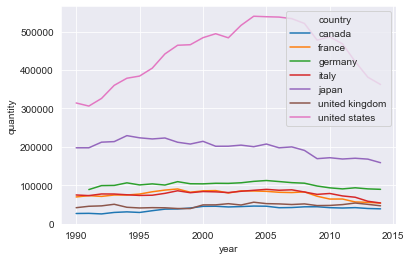

In [29]:
df_crude_oil_imports = df[df.commodity=='conventional crude oil - imports']
sns.lineplot(data=df_crude_oil_imports,x='year',y='quantity',hue='country')

Since the United States has so many refineries and a large domestic consumption, this would attribute to an increase in the import curve while the production has decreased and imports decreasing while production is increasing.Interesting enough, most of the European countries are reliant on the imports.When examining Canada,they are at the lowest and have been consistent due to them producing enough for their domestic market. They are also done by the provinces which are far away from the crude defining provinces due to the country's large size.

<AxesSubplot:xlabel='year', ylabel='quantity'>

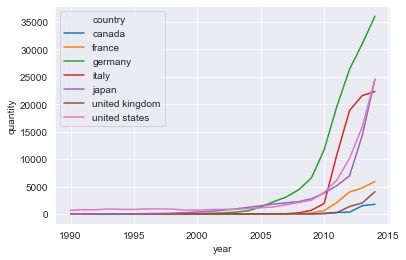

In [32]:
df_solar_prod = df[df.commodity=='electricity - total solar production']
sns.lineplot(data=df_solar_prod,x='year',y='quantity',hue='country')

Germany is leading in solar electricity production with the United States, Japan, and Italy following in pursuit.

<AxesSubplot:xlabel='year', ylabel='quantity'>

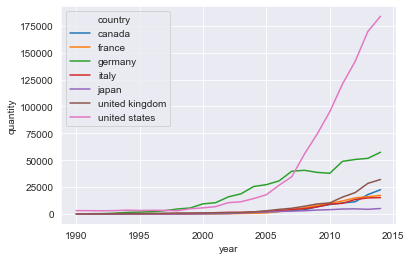

In [36]:
df_wind_prod = df[df.commodity=='electricity - total wind production']
sns.lineplot(data=df_wind_prod,x='year',y='quantity',hue='country')

In the reverse opposite, the United States is leading in wind electricity production with Germany in 2nd.